In [137]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [139]:
df=pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [141]:
df=df.drop(["No","X5 latitude","X6 longitude"],axis=1)

In [143]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


In [153]:
#df2['X1 transaction date'] = pd.to_datetime(df2['X1 transaction date']).dt.year
#df2['X1 transaction date'] = df2['X1 transaction date'].astype(str).str[:4]
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df['X1 transaction date'] = df['X1 transaction date'].astype(int)

In [155]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int32  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 14.7 KB


In [159]:
x=df.drop(["Y house price of unit area"],axis=1)
y=df["Y house price of unit area"]

In [214]:
correlation=x.corr()

<Axes: >

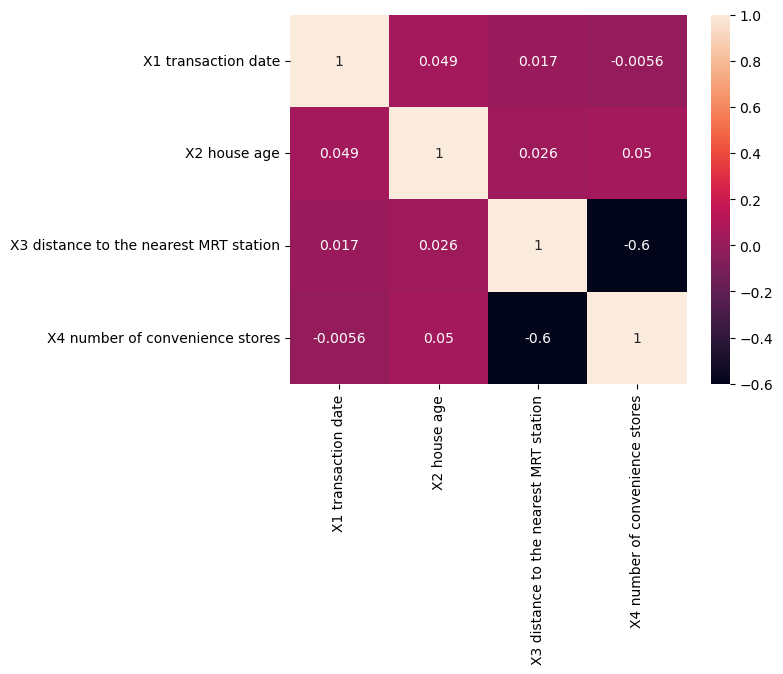

In [218]:
import seaborn as sn
sn.heatmap(correlation,annot=True)

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [165]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [167]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [169]:
predt=lr.predict(xtest)

In [171]:
lr.score(xtrain,ytrain)#train score

0.5437555817102669

In [173]:
lr.score(xtest,ytest)#test score

0.5643696003958125

In [175]:
from sklearn.metrics import mean_squared_error,r2_score

In [177]:
mse=mean_squared_error(ytest,predt)
r2=r2_score(ytest,predt)

In [179]:
print(f"the MSE value is {mse}")
print(f"the r2_score value is {r2}")

the MSE value is 72.84834417663747
the r2_score value is 0.5643696003958125


# **polynominal**

In [182]:
poly=PolynomialFeatures(degree=3)
x_train_poly=poly.fit_transform(xtrain)
x_test_poly=poly.transform(xtest)

In [183]:
lr.fit(x_train_poly,ytrain)

LinearRegression()

In [184]:
poly_predt=lr.predict(x_test_poly)

In [185]:
lr.score(x_train_poly,ytrain)#train score

0.6463772215251635

In [186]:
lr.score(x_test_poly,ytest)#test score

0.6185415684704803

In [187]:
poly_mse=mean_squared_error(ytest,poly_predt)
poly_r2=r2_score(ytest,poly_predt)

In [188]:
print(f"the POLY_MSE value is {poly_mse}")
print(f"the POLY_r2_score value is {poly_r2}")

the POLY_MSE value is 63.78943052273534
the POLY_r2_score value is 0.6185415684704803


## **make pipeline**

In [190]:
pipeline=make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [191]:
pipeline_predt=pipeline.predict(xtest)

In [201]:
pipeline.score(xtest,ytest)

0.6185415684704803

In [203]:
pipeline.predict([[1970,	20.3	,287.60250	,6]])

C:\Users\Dream\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([-62.66157941])

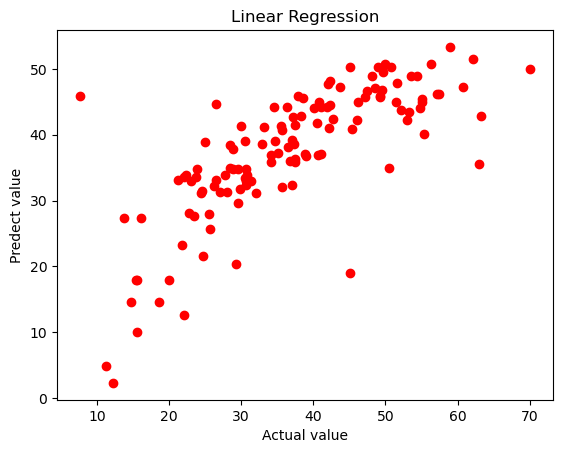

In [205]:
plt.scatter(ytest,predt,color="r")
plt.xlabel("Actual value")
plt.ylabel("Predect value")
plt.title("Linear Regression")
plt.show()

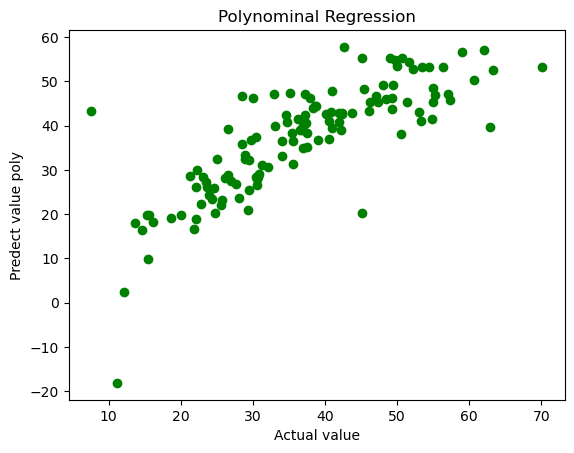

In [207]:
plt.scatter(ytest,poly_predt,color="g")
plt.xlabel("Actual value")
plt.ylabel("Predect value poly")
plt.title("Polynominal Regression")
plt.show()

<br/>
<br/>

### **By compareing the MSE and R2_score value.The Polynominal Regression perfrom batter Then the Multiple Linear regression.**<br/>
##### the POLY_MSE value is 63.78943052273534<br/>
##### the POLY_r2_score value is 0.6185415684704803<br/>

<br/>

##### the MSE value is 72.84834417663747<br/>
##### the r2_score value is 0.5643696003958125<br/>